In [91]:
import numpy as np
from matplotlib import pyplot as plt

class obj:
    def __init__(self, x1, x2, z1, z2):
        self.x1 = x1
        self.x2 = x2
        self.z1 = z1
        self.z2 = z2

box_dist = 10  # distance in each dimesion surrounding line segment

def diff(p1, p2):
    return (p1[0] - p2[0],
            p1[1] - p2[1],
            p1[0] * p2[1] - p2[0] * p1[1])

def rotate_point(point, theta):
    return point[0] * np.cos(theta) - point[1] * np.sin(theta), point[0] * np.sin(theta) + point[1] * np.cos(theta)

def trans_point(point, trans):
    return point[0] + trans[0], point[1] + trans[1]

def get_bounding_box(x1, x2, z1, z2):
        o1 = (x1, z1)
        o2 = (x2, z2)
        mov = o2
        o1 = (o1[0] - mov[0], o1[1] - mov[1])
        # Rotates o1 about o2/origin so that o1 is directly above o2
        if o1[1] == 0:
            theta = (1 / 2) * np.pi if o1[0] > 0 else -(1 / 2) * np.pi
        else:
            theta = np.arctan(o1[0] / o1[1]) if o1[1] >= 0 else np.arctan(o1[0] / o1[1]) + np.pi

        o1 = rotate_point(o1, theta)
        p1 = (-box_dist, o1[1] + box_dist)
        p2 = (box_dist, o1[1] + box_dist)
        p3 = (box_dist, -box_dist)
        p4 = (-box_dist, -box_dist)

        # Rotates p1, p2, and p3 by negative theta (original orientation)
        p1 = rotate_point(p1, -theta)
        p2 = rotate_point(p2, -theta)
        p3 = rotate_point(p3, -theta)
        p4 = rotate_point(p4, -theta)

        # Translates points back to relative positions
        p1 = trans_point(p1, mov)
        p2 = trans_point(p2, mov)
        p3 = trans_point(p3, mov)
        p4 = trans_point(p4, mov)
        
        return (p1, p2, p3, p4)


def intersection(x1, x2, z1, z2, objects):
    objects = map(lambda o: (o.x1, o.x2, o.z1, o.z2), objects)
    if x1 < x2:
        points = get_bounding_box(x1, x2, z1, z2)
    elif x1 > x2:
        points = get_boudning_box(x2, x1, z2, z1)
    else:
        if z1 < z2:
            points = ((x1 - box_dist, z1 - box_dist),
                      (x1 + box_dist, z1 - box_dist),
                      (x2 + box_dist, z2 + box_dist),
                      (x2 - box_dist, z2 + box_dist))
        else:
            points = ((x2 - box_dist, z2 - box_dist),
                      (x2 + box_dist, z2 - box_dist),
                      (x1 + box_dist, z1 + box_dist),
                      (x1 - box_dist, z1 + box_dist))
    p2p3 = (points[2][0] - points[1][0], points[2][1] - points[1][1])
    p2p1 = (points[0][0] - points[1][0], points[0][1] - points[1][1])
    print(points)
    point_diffs = (diff(points[1], points[0]), diff(points[2], points[1]), diff(points[3], points[2]), diff(points[3], points[0]))
    
    print(point_diffs)
    for x3, x4, z3, z4 in objects:
        # intersection = []
        if x3 > x4:
            temp = (x3, z3)
            x3, z3 = (x4, z4)
            x4, z4 = temp
        diffs_obj = (x3 - x4, z3 - z4, x3 * z4 - x4 * z3)

        for doni in range(4):
            if (D := point_diffs[doni][0] * diffs_obj[1] - point_diffs[doni][1] * diffs_obj[0]) != 0:
                x = (point_diffs[doni][2] * diffs_obj[1] - point_diffs[doni][1] * diffs_obj[2]) / D
                print(x)
                if x3 <= x <= x4:
                    y = (point_diffs[doni][0] * diffs_obj[2] - point_diffs[doni][2] * diffs_obj[0]) / D
                    p2m = (x - points[0][0], y - points[0][1])
                    print('y '+ str(y))
                    if 0 <= np.dot(p2m, p2p3) < np.dot(p2p3, p2p3) and 0 <= np.dot(p2m, p2p1) < np.dot(p2p1, p2p1):
                        return True
                
    return False

((-8, -8), (12, -8), (12, 14), (-8, 14))
((20, 0, -160), (0, 22, -264), (-20, 0, -280), (0, 22, 176))
-8.0
-8.0
14.0
y -89.0
-13.714285714285714
False


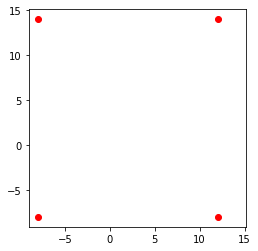

In [93]:
X = [2, 3]
Y = [2, 3]
val = get_bounding_box(2,2,2,4)
print(intersection(2,2,2,4, [obj(12,40,-8,0)]))

X1 = [v1 for v1,v2 in val]
Y1 = [v2 for v1,v2 in val]
#plt.plot(X, Y, 'bo')
plt.plot(X1, Y1, 'ro')
plt.axis('square')
plt.show()